# Linear Regression using Neural Network in PyTorch
In this tutorial, we'll implement a simple linear regression model using a neural network in PyTorch. Linear regression is the process of fitting a linear equation to observed data, which allows us to make predictions.


In [ ]:
# First, let's import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

## Data Loading
For simplicity, we'll use the Boston Housing dataset, which is a popular dataset for regression tasks. It contains information about houses in Boston and their corresponding prices.


In [ ]:
# Download the Boston Housing dataset
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data -O boston_housing.csv

--2023-09-19 10:12:02--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49081 (48K) [text/plain]
Saving to: ‘boston_housing.csv’

boston_housing.csv  100%[===================>]  47.93K  --.-KB/s    in 0.03s   

2023-09-19 10:12:02 (1.85 MB/s) - ‘boston_housing.csv’ saved [49081/49081]



## Data Preprocessing
Let's load the dataset, take a look at it, and preprocess it for our model.


In [ ]:
# Load the dataset
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("boston_housing.csv", header=None, delim_whitespace=True, names=column_names)

# Show the first few rows of the data
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


For simplicity, let's use just one feature ("RM" - average number of rooms per dwelling) to predict the house price ("MEDV"). We'll also normalize the data for better training stability.


In [ ]:
# Extracting the required features and target
X = data["RM"].values
y = data["MEDV"].values

# Normalize the data
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)


## Neural Network for Linear Regression
Now, let's define our simple neural network for linear regression. It will have one input neuron (for our feature) and one output neuron (for the prediction).


In [ ]:
class LinearRegressionNN(nn.Module):
    def __init__(self):
        super(LinearRegressionNN, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)  # single input and output

    def forward(self, x):
        return self.linear(x)


## Model Training
Let's now instantiate the model, define our loss function and optimizer, and train the model.


Epoch [100/1000], Loss: 0.5299
Epoch [200/1000], Loss: 0.5167
Epoch [300/1000], Loss: 0.5165
Epoch [400/1000], Loss: 0.5165
Epoch [500/1000], Loss: 0.5165
Epoch [600/1000], Loss: 0.5165
Epoch [700/1000], Loss: 0.5165
Epoch [800/1000], Loss: 0.5165
Epoch [900/1000], Loss: 0.5165
Epoch [1000/1000], Loss: 0.5165


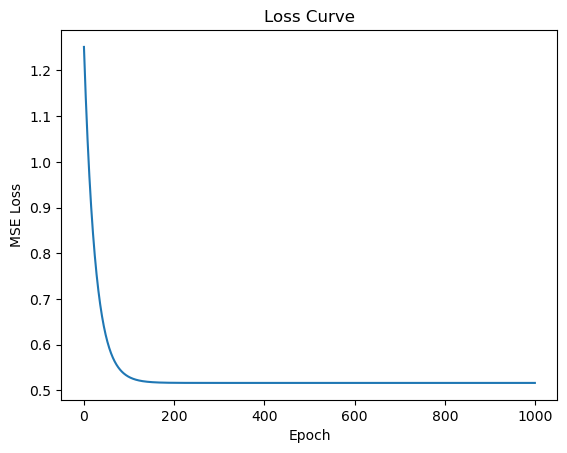

In [ ]:
# Model, Loss, and Optimizer
model = LinearRegressionNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training Loop
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the loss
    losses.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plot the loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Curve")
plt.show()


## Model Evaluation
Finally, let's plot the model's predictions against the actual data to see how well it has learned.


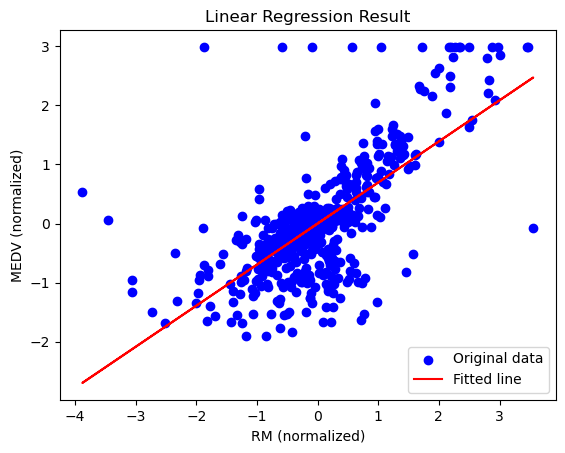

In [ ]:
# Model predictions
predicted = model(X).detach().numpy()

# Plotting
plt.scatter(X.numpy(), y.numpy(), label='Original data', color='blue')
plt.plot(X.numpy(), predicted, label='Fitted line', color='red')
plt.legend()
plt.xlabel("RM (normalized)")
plt.ylabel("MEDV (normalized)")
plt.title("Linear Regression Result")
plt.show()


## Conclusion
As we can see, the neural network successfully approximates a linear relationship between the number of rooms and the median value of the houses. This is a simple example, and in real-world scenarios, more features and complex models might be needed.
